In [151]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams ['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create

In [152]:
#Read in the data

df= pd.read_csv('D:\\Python Training Dataset\\Data Analyst Portfolio Project\\movies.csv')

In [153]:
#Let's look at the data

df.head()

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  22/08/1986       89   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  11/06/1986      103   
2     Action  179800601                   Top Gun     PG  16/05/1986      110   
3     Action   85160248                    Aliens      R  18/07/1986      137   
4  Adventure   18564613   Flight of the Navigator     PG  01/08/1986       90   

   score               star   votes         writer  year  
0    8.1        Wil Wheaton  299174   Stephen King  1986  
1    7.8  Matthew Broderick  264740    John Hughes  1986  
2    6.9         Tom Cruise  236909       Jim Cash  1986  
3    8.4   Sigourney Weaver  540152  James Cameron  1986  
4    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [154]:
#Let's see if there is any missing data

for col in df.columns :
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [155]:
#Data type for our column 

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [156]:
#Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [180]:
df.head()

budget  company  country  director  genre      gross  name  rating  \
6380  245000000     1428       54      1037      0  936662225  4679       7   
5061  237000000     2062       53      1066      0  760507625   501       7   
2420  200000000     2062       54      1066      6  658672302  6177       7   
6391  150000000     2085       54       466      0  652270625  2721       7   
5723  220000000     1491       54      1412      0  623357910  4995       7   

       released  runtime  score  star    votes  writer  year  yearcorrect  
6380 2015-12-18      136    8.1   475   687192    2356  2015         2015  
5061 2009-12-18      162    7.8  2084   954412    1629  2009         2009  
2420 1997-12-19      194    7.8  1444   862554    1629  1997         1997  
6391 2015-12-06      124    7.0   404   469200    3310  2015         2015  
5723 2012-04-05      143    8.1  2001  1064633    2145  2012         2012

In [179]:
#Create correct year column

#df['yearcorrect'] = df['released'].astype(datetime).str[6:]
df['released'] = pd.to_datetime(df['released'])
df['yearcorrect'] = pd.DatetimeIndex(df['released']).year
df.head()

budget  company  country  director  genre      gross  name  rating  \
6380  245000000     1428       54      1037      0  936662225  4679       7   
5061  237000000     2062       53      1066      0  760507625   501       7   
2420  200000000     2062       54      1066      6  658672302  6177       7   
6391  150000000     2085       54       466      0  652270625  2721       7   
5723  220000000     1491       54      1412      0  623357910  4995       7   

       released  runtime  score  star    votes  writer  year  yearcorrect  
6380 2015-12-18      136    8.1   475   687192    2356  2015         2015  
5061 2009-12-18      162    7.8  2084   954412    1629  2009         2009  
2420 1997-12-19      194    7.8  1444   862554    1629  1997         1997  
6391 2015-12-06      124    7.0   404   469200    3310  2015         2015  
5723 2012-04-05      143    8.1  2001  1064633    2145  2012         2012

In [159]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [160]:
#pd.set_option('display.max_rows', None)

In [161]:
#Drop any duplicate

df['company'].drop_duplicates().sort_values(ascending=False)

5288                                          micro_scope
3486                                             i5 Films
6084                                                 erbp
3225                                       double A Films
2707                          Zucker Brothers Productions
1495                                   Zeta Entertainment
5905                                 Zentropa Productions
5917                        Zentropa International Norway
3126                              Zentropa Entertainments
329                                  Zenith Entertainment
4710                                      Zazen Produ��es
542                              Zanuck/Brown Productions
698                                   Zanuck Company, The
499                           Zacharias-Buhai Productions
4687                           Young Hannibal Productions
5084                                          Yellow Bird
4118                                       Yash Raj Films
4578          

In [162]:
df.head()

budget                                 company country  \
6380  245000000                               Lucasfilm     USA   
5061  237000000  Twentieth Century Fox Film Corporation      UK   
2420  200000000  Twentieth Century Fox Film Corporation     USA   
6391  150000000                      Universal Pictures     USA   
5723  220000000                          Marvel Studios     USA   

             director   genre      gross                          name rating  \
6380      J.J. Abrams  Action  936662225  Star Wars: The Force Awakens  PG-13   
5061    James Cameron  Action  760507625                        Avatar  PG-13   
2420    James Cameron   Drama  658672302                       Titanic  PG-13   
6391  Colin Trevorrow  Action  652270625                Jurassic World  PG-13   
5723      Joss Whedon  Action  623357910                  The Avengers  PG-13   

       released  runtime  score               star    votes           writer  \
6380 2015-12-18      136    8.1       Daisy Ridley   687192  Lawrence Kasdan   
5061 2009-12-18      162    7.8    Sam Worthington   954412    James Cameron   
2420 1997-12-19      194    7.8  Leonardo DiCaprio   862554    James Cameron   
6391 2015-12-06      124    7.0        Chris Pratt   469200       Rick Jaffa   
5723 2012-04-05      143    8.1  Robert Downey Jr.  1064633      Joss Whedon   

      year  yearcorrect  
6380  2015         2015  
5061  2009         2009  
2420  1997         1997  
6391  2015         2015  
5723  2012         2012

In [163]:
#Budget high correlation
#Company high correlation


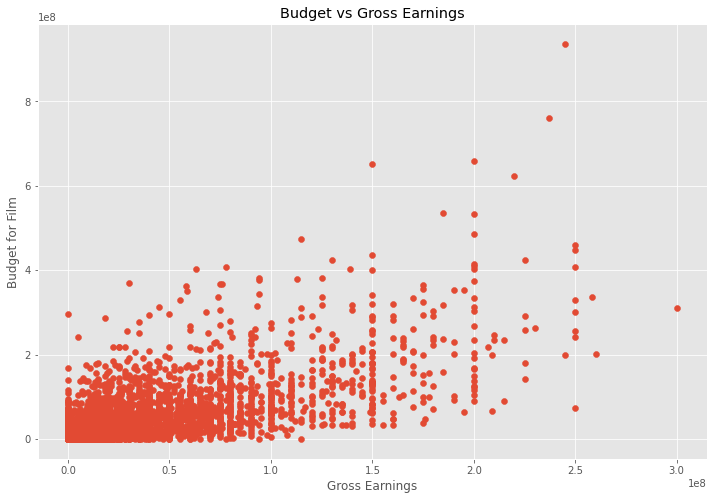

In [164]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y =df['gross'] )

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [165]:
df.head()

budget                                 company country  \
6380  245000000                               Lucasfilm     USA   
5061  237000000  Twentieth Century Fox Film Corporation      UK   
2420  200000000  Twentieth Century Fox Film Corporation     USA   
6391  150000000                      Universal Pictures     USA   
5723  220000000                          Marvel Studios     USA   

             director   genre      gross                          name rating  \
6380      J.J. Abrams  Action  936662225  Star Wars: The Force Awakens  PG-13   
5061    James Cameron  Action  760507625                        Avatar  PG-13   
2420    James Cameron   Drama  658672302                       Titanic  PG-13   
6391  Colin Trevorrow  Action  652270625                Jurassic World  PG-13   
5723      Joss Whedon  Action  623357910                  The Avengers  PG-13   

       released  runtime  score               star    votes           writer  \
6380 2015-12-18      136    8.1       Daisy Ridley   687192  Lawrence Kasdan   
5061 2009-12-18      162    7.8    Sam Worthington   954412    James Cameron   
2420 1997-12-19      194    7.8  Leonardo DiCaprio   862554    James Cameron   
6391 2015-12-06      124    7.0        Chris Pratt   469200       Rick Jaffa   
5723 2012-04-05      143    8.1  Robert Downey Jr.  1064633      Joss Whedon   

      year  yearcorrect  
6380  2015         2015  
5061  2009         2009  
2420  1997         1997  
6391  2015         2015  
5723  2012         2012

<AxesSubplot:xlabel='budget', ylabel='gross'>

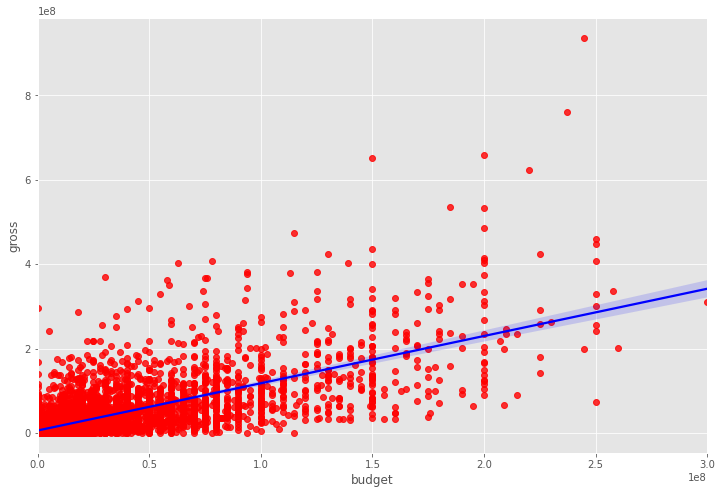

In [166]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [167]:
#Let's start looking corelation 

In [168]:
df.corr(method = 'pearson') #Pearson, kendall, spearman

budget     gross   runtime     score     votes      year  \
budget       1.000000  0.712196  0.268226  0.042145  0.503924  0.291009   
gross        0.712196  1.000000  0.224579  0.165693  0.662457  0.191548   
runtime      0.268226  0.224579  1.000000  0.395343  0.317399  0.087639   
score        0.042145  0.165693  0.395343  1.000000  0.393607  0.105276   
votes        0.503924  0.662457  0.317399  0.393607  1.000000  0.229304   
year         0.291009  0.191548  0.087639  0.105276  0.229304  1.000000   
yearcorrect  0.274820  0.176879  0.088342  0.117679  0.220797  0.996229   

             yearcorrect  
budget          0.274820  
gross           0.176879  
runtime         0.088342  
score           0.117679  
votes           0.220797  
year            0.996229  
yearcorrect     1.000000

In [169]:
#High correlation between budget and gross
#I was right

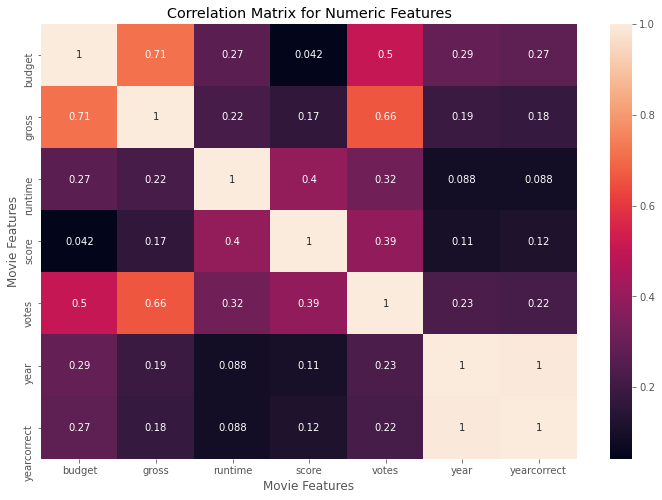

In [170]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [171]:
#Look at Company

df.head()

budget                                 company country  \
6380  245000000                               Lucasfilm     USA   
5061  237000000  Twentieth Century Fox Film Corporation      UK   
2420  200000000  Twentieth Century Fox Film Corporation     USA   
6391  150000000                      Universal Pictures     USA   
5723  220000000                          Marvel Studios     USA   

             director   genre      gross                          name rating  \
6380      J.J. Abrams  Action  936662225  Star Wars: The Force Awakens  PG-13   
5061    James Cameron  Action  760507625                        Avatar  PG-13   
2420    James Cameron   Drama  658672302                       Titanic  PG-13   
6391  Colin Trevorrow  Action  652270625                Jurassic World  PG-13   
5723      Joss Whedon  Action  623357910                  The Avengers  PG-13   

       released  runtime  score               star    votes           writer  \
6380 2015-12-18      136    8.1       Daisy Ridley   687192  Lawrence Kasdan   
5061 2009-12-18      162    7.8    Sam Worthington   954412    James Cameron   
2420 1997-12-19      194    7.8  Leonardo DiCaprio   862554    James Cameron   
6391 2015-12-06      124    7.0        Chris Pratt   469200       Rick Jaffa   
5723 2012-04-05      143    8.1  Robert Downey Jr.  1064633      Joss Whedon   

      year  yearcorrect  
6380  2015         2015  
5061  2009         2009  
2420  1997         1997  
6391  2015         2015  
5723  2012         2012

In [172]:
df_numerized = df

for col_name in df_numerized.columns :
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized        
    

budget  company  country  director  genre      gross  name  rating  \
6380  245000000     1428       54      1037      0  936662225  4679       7   
5061  237000000     2062       53      1066      0  760507625   501       7   
2420  200000000     2062       54      1066      6  658672302  6177       7   
6391  150000000     2085       54       466      0  652270625  2721       7   
5723  220000000     1491       54      1412      0  623357910  4995       7   
4840  185000000     2123       54       440      0  534858444  5189       7   
6614  200000000     1428       54       835      0  532177324  4206       7   
6687  200000000     1720       54       128      2  486295561  1836       6   
2870  115000000     1428       54       885      0  474544677  4675       6   
6398  250000000     1491       54      1412      0  459005868   502       7   
5720  250000000     2123       53       440      0  448139099  5190       7   
4001  150000000      821       54       109      2  436471036  4464       6   
5954  130000000      662       54       796      0  424668047  5446       7   
4404  225000000     2122       54       914      0  423315812  3891       7   
5309  200000000     2122       54      1554      2  415004880  6223       2   
5959  200000000     1491        9      2377      0  409013994  2594       7   
6624  250000000     1491       54       160      0  408084349   945       7   
5722   78000000     1409       54       851      1  408010692  5445       7   
3522  139000000      665       54      2317      0  403706375  4630       7   
1544   63000000     2085       54      2488      1  402453882  2719       7   
5082  200000000      821       54      1758      0  402111870  6240       7   
5943  150000000     2119       54       394      2  400738009  1973       6   
5500  125000000     2123       54       624      1  381011219  2212       7   
3750   94000000     1720       54       128      2  380843261  1838       2   
4195  113000000     1428       54       885      0  380262555  4677       7   
3743   94000000     1582       54      2045      1  377845905  5597       7   
3997  200000000      665       54      2317      0  373585825  4631       7   
3987   30000000     1212       54      1745      6  370782930  5748       8   
6658   75000000     2085       29       407      2  368384330  2877       6   
5987   76000000     2085       54      2091      2  368061265  1393       6   
6676  175000000      926       53      1348      1  364001123  5507       6   
6616   58000000     2062       54      2574      0  363070709  1340       8   
6402  175000000     1720       54      2022      2  356461711  2556       6   
6408  190000000     2085       54      1097      0  353007020  1987       7   
5521  195000000     1680       54      1758      0  352390543  6239       7   
6184   58800000     2123       54       459      0  350126372   353       8   
3530   94000000     1582       54      2045      1  342551365  5598       7   
6630  150000000     2122       54       335      2  341268248  6721       6   
6197  125000000      662       54       796      0  337135885  5447       7   
4637  258000000      664       54      2317      0  336530303  4632       7   
6442   74000000     1214       54      1520      2  336045770  3341       6   
5301  200000000     2122       54      2566      1  334191110   291       6   
6162  170000000     1491       54      1077      0  333176600  2144       7   
6619  250000000     2123       54      2744      0  330360194   575       7   
1762   55000000     1680       54      2241      4  330252182  1910       7   
6603  175000000      240       54       550      0  325100054  4773       7   
4670  160000000      822       54       404      2  320706665  4466       6   
4620  150000000      821       54      1758      0  319071806  6237       7   
4847  140000000     1680       54      1348      0  318412101  2592       7   
3300  125000000     2123       53       397      1  3175755

In [173]:
df.head()

budget  company  country  director  genre      gross  name  rating  \
6380  245000000     1428       54      1037      0  936662225  4679       7   
5061  237000000     2062       53      1066      0  760507625   501       7   
2420  200000000     2062       54      1066      6  658672302  6177       7   
6391  150000000     2085       54       466      0  652270625  2721       7   
5723  220000000     1491       54      1412      0  623357910  4995       7   

       released  runtime  score  star    votes  writer  year  yearcorrect  
6380 2015-12-18      136    8.1   475   687192    2356  2015         2015  
5061 2009-12-18      162    7.8  2084   954412    1629  2009         2009  
2420 1997-12-19      194    7.8  1444   862554    1629  1997         1997  
6391 2015-12-06      124    7.0   404   469200    3310  2015         2015  
5723 2012-04-05      143    8.1  2001  1064633    2145  2012         2012

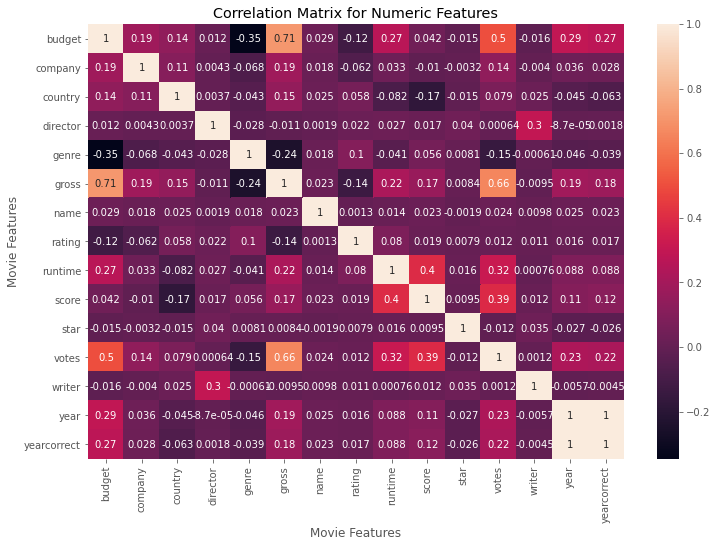

In [174]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [175]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
             gross          0.712196
             name           0.028712
             rating        -0.119660
             runtime        0.268226
             score          0.042145
             star          -0.015062
             votes          0.503924
             writer        -0.015611
             year           0.291009
             yearcorrect    0.274820
company      budget         0.187205
             company        1.000000
             country        0.107950
             director       0.004320
             genre         -0.068330
             gross          0.187220
             name           0.018098
             rating        -0.062250
             runtime        0.033058
             score         -0.010426
             star          -0.003160
             votes          0.138662
 

In [176]:
sorted_pairs =  corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
genre        gross         -0.242676
gross        genre         -0.242676
score        country       -0.174414
country      score         -0.174414
votes        genre         -0.150519
genre        votes         -0.150519
rating       gross         -0.135538
gross        rating        -0.135538
rating       budget        -0.119660
budget       rating        -0.119660
country      runtime       -0.081796
runtime      country       -0.081796
genre        company       -0.068330
company      genre         -0.068330
yearcorrect  country       -0.062707
country      yearcorrect   -0.062707
company      rating        -0.062250
rating       company       -0.062250
year         genre         -0.046259
genre        year          -0.046259
country      year          -0.045204
year         country       -0.045204
genre        country       -0.042793
country      genre         -0.042793
genre        runtime       -0.041357
r

In [177]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        budget         0.503924
budget       votes          0.503924
gross        votes          0.662457
votes        gross          0.662457
budget       gross          0.712196
gross        budget         0.712196
yearcorrect  year           0.996229
year         yearcorrect    0.996229
budget       budget         1.000000
rating       rating         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [178]:
#Votes and budet have the highest correlation to gross earning

#Company has Low correlation
#I was wrong